In [22]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Instructions
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [23]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [24]:
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date']) 

In [25]:
numerical_df = customer_df.select_dtypes(include = np.number)
categorical_df = customer_df.select_dtypes(include="object")

- Open the categoricals variable we created before.

In [26]:
categorical_df.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


- Plot all the categorical variables with the proper plot. What can you see?

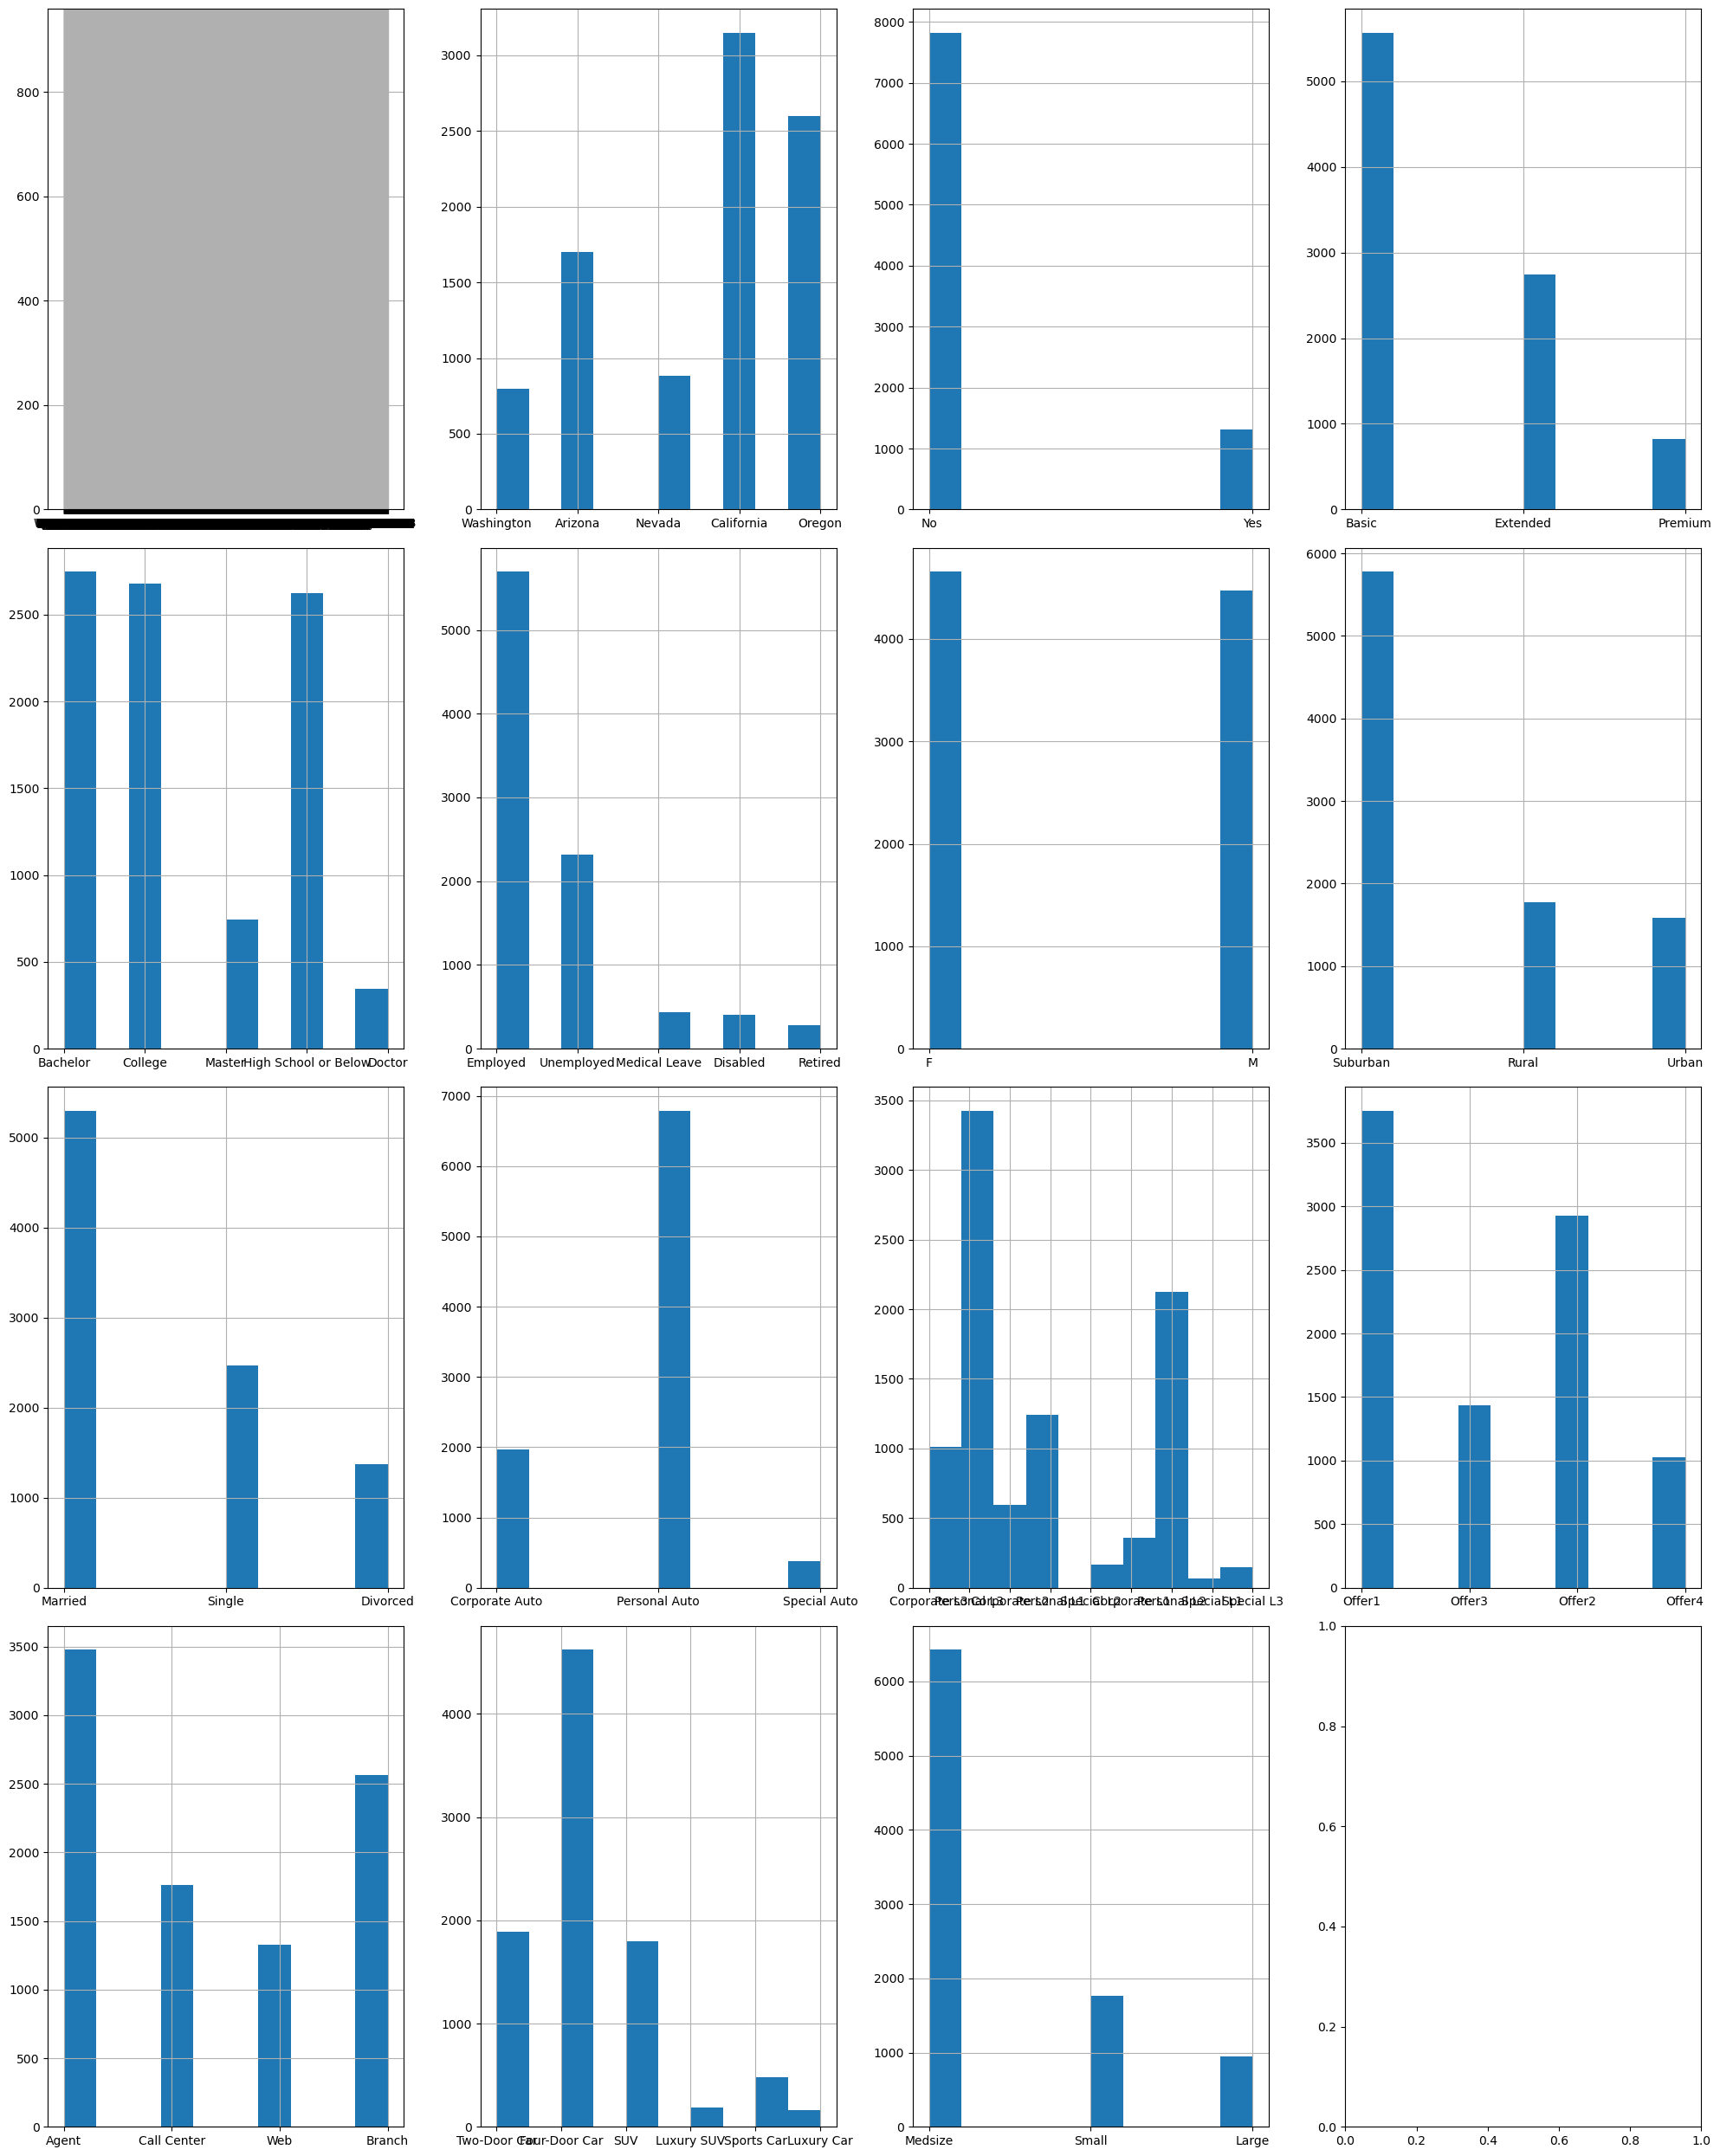

In [27]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 25))

categorical_df['Customer'].hist(ax=axs[0, 0],)
categorical_df['State'].hist(ax=axs[0, 1],)
categorical_df['Response'].hist(ax=axs[0, 2],)
categorical_df['Coverage'].hist(ax=axs[0, 3],)
categorical_df['Education'].hist(ax=axs[1, 0],)
categorical_df['EmploymentStatus'].hist(ax=axs[1, 1],)
categorical_df['Gender'].hist(ax=axs[1, 2],)
categorical_df['Location Code'].hist(ax=axs[1, 3],)
categorical_df['Marital Status'].hist(ax=axs[2, 0],)
categorical_df['Policy Type'].hist(ax=axs[2, 1],)
categorical_df['Policy'].hist(ax=axs[2, 2],)
categorical_df['Renew Offer Type'].hist(ax=axs[2, 3],)
categorical_df['Sales Channel'].hist(ax=axs[3, 0])
categorical_df['Vehicle Class'].hist(ax=axs[3, 1])
categorical_df['Vehicle Size'].hist(ax=axs[3, 2])

plt.tight_layout()
plt.show()

- There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [30]:
categorical_df = categorical_df.drop("Customer", axis=1)

In [31]:
from sklearn.preprocessing import LabelEncoder
lebel = categorical_df.apply(LabelEncoder().fit_transform)
lebel

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,1,1,1,1,1,4,2,1,0,0


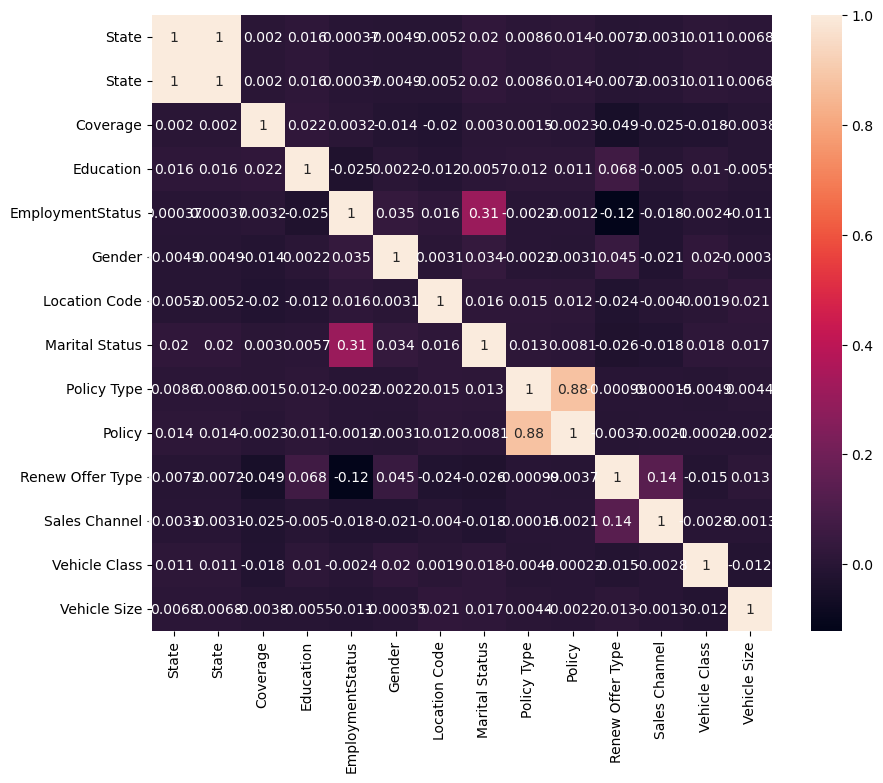

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data_corr = lebel[['State', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel','Vehicle Class','Vehicle Size']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

- Plot time variable. Can you extract something from it?

In [34]:
customer_df['Effective To Date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: Effective To Date, Length: 9134, dtype: datetime64[ns]

In [35]:
customer_df['Effective To Date'].dt.month

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: Effective To Date, Length: 9134, dtype: int64

In [36]:
customer_df['Effective To Date'].dt.day

0       24
1       31
2       19
3       20
4        3
        ..
9129    10
9130    12
9131     6
9132     3
9133    14
Name: Effective To Date, Length: 9134, dtype: int64

In [37]:
customer_df['Effective To Date'].dt.year

0       2011
1       2011
2       2011
3       2011
4       2011
        ... 
9129    2011
9130    2011
9131    2011
9132    2011
9133    2011
Name: Effective To Date, Length: 9134, dtype: int64